In [1]:
# Part 1: Data Scraping and Preparation

# Step 1: Scraping competitor's data
# This step is used to extract the table from the Space Weather Live website by using a HTTP GET request for the website, finding
# the table in the HTML code, and returning the dataframe with specified columns for the table.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt

# HTTP GET request for competitor's website
r = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')
# create BeautifulSoup object
bs = BeautifulSoup(r.content)

# finds table in HTML code
table = bs.find("table")
table_str = str(table)
# reads in HTML and returns list of dataframes for table
dfs = pd.read_html(table_str)
dfs2 = dfs[0] 
# assign column labels for each column in table
dfs2.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']
# end result
dfs2

,rank,x_classification,date,region,start_time,max_time,end_time,movie
0,1,X28.0,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17.0,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10.0,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9.0,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [ ]:
print(bs.prettify())

In [2]:
# Step 2: Tidying competitor's data
# This step tidies the table we extracted from the Space Weather Live website by dropping the irrelevant movie column, combining
# the date column with each of the three time columns, dropping the date column, manipulating missing entries in region column,
# and renaming the columns.

# drops last column of table
dfs2 = dfs2.drop(columns=['movie'])

# combines date column with each of the three time columns and drops the date column
dfs2['start_time'] = pd.to_datetime(dfs2['date'] + " " + dfs2['start_time'])
dfs2['max_time'] = pd.to_datetime(dfs2['date'] + " " + dfs2['max_time']) 
dfs2['end_time'] = pd.to_datetime(dfs2['date'] + " " + dfs2['end_time'])
dfs2 = dfs2.drop(columns=['date'])

# replaces missing (-) regions as NaN
dfs2['region'] = dfs2['region'].replace(['-'], np.NaN)
# rename column labels for each column in table
dfs2.columns = ['rank', 'x_classification', 'region', 'start_datetime', 'max_datetime', 'end_datetime']
# end result
dfs2

,rank,x_classification,region,start_datetime,max_datetime,end_datetime
0,1,X28.0,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17.0,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10.0,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9.0,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [3]:
# Step 3: Scraping NASA's data
# This time, we extract the table from the NASA website by using a GET request, finding the table in the HTML code, splitting the
# table into separate lines, deleting unwanted rows, extracting the 15 columns for the table, and creates a dataframe with 
# specified columns from that table.

# HTTP GET request for NASA's website
r2 = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
# create BeautifulSoup object
bs2 = BeautifulSoup(r2.content)

# finds table in HTML code
pre_data = bs2.find("pre")
pre_text = pre_data.text
table2 = pre_text.split('\n')
# deletes unwanted rows
del table2[0:12]
del table2[-3:]
# extracts first 15 columns in each row
for index, row in enumerate(table2):
    x = row.split()
    x = x[0:15]
    table2[index] = x
# creates dataframe for table
df = pd.DataFrame(data=table2)
# assign column labels for each column in table
df.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location',
              'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'plots']
# end result
df

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,plots
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


In [ ]:
print(bs2.prettify())

In [4]:
# Step 4: Tidying NASA's data
# We also tidy the table we extracted from the NASA website by manipulating missing entries, creating two new column indicating if
# a flare is a halo and if width is a lower bound, combining date and time columns for start, end, and cme, and renaming the
# columns.

# replaces missing entries (with hyphens) as NaN
df = df.replace(regex=r'.*--.*', value=np.NaN)

# creates new column to determine if flare is halo
df['is_halo'] = np.where(df['cme_angle'] == 'Halo', 'True', 'False')
# replaces each value that has Halo in cme angle column with NA
df['cme_angle'] = df['cme_angle'].replace(['Halo'], 'NA')

# creates new column to determine if width is lower bound
lower_bound_list = []
for ele in df['cme_width'].astype(str):
    if '>' in ele:
        lower_bound_list.append(True)
    else:
        lower_bound_list.append(False)
df['width_lower_bound']= lower_bound_list
# replaces each value that has lower bound in cme width column with just the number itself
df['cme_width'] = df['cme_width'].replace(regex=r'>+', value='')

# replaces midnight end times with 23:59
df['end_time'] = df['end_time'].replace(['24:00'], '23:59')
# combines date and time columns for start, end and cme so they can be encoded as datetime objects
df['start_time'] = pd.to_datetime(df['start_date'] + " " + df['start_time'])
df['end_date'] = df['start_time'].dt.year.astype(str) + '/' + df['end_date']   # appends the year + / to the end date
df['end_time'] = pd.to_datetime(df['end_date'] + " " + df['end_time'])
df['cme_date'] = df['start_time'].dt.year.astype(str) + '/' + df['cme_date']   # appends the year + / to the cme date
df['cme_time'] = pd.to_datetime(df['cme_date'] + " " + df['cme_time'])
df = df.drop(columns=['start_date', 'end_date', 'cme_date'])
# rename column labels for each column in table
df.columns = ['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 
              'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed', 'plots', 'is_halo',
              'width_lower_bound']
# end result
df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


In [5]:
# Part 2: Analysis

# Question 1: Replication
top_50_flares = df.sort_values('flare_classification', ascending=False)
# extracts top 50 solar flares information
top_50_flares = top_50_flares.head(50)
# strips the X from classification, converts each element to float, and sorts them in descending order
top_50_flares['flare_classification'] = top_50_flares['flare_classification'].replace(regex=r'X+', value='')
top_50_flares['flare_classification'] = top_50_flares['flare_classification'].astype(float)
top_50_flares = top_50_flares.sort_values('flare_classification', ascending=False)
# re-append the X for all the flare classifications
top_50_flares['flare_classification'] = 'X' + top_50_flares['flare_classification'].astype(str)
top_50_flares

# The top 50 solar flares from the NASA table are fairly similar to the ones in the Space Weather Live table. For the most part,
# the start and end dates match up but the times are slightly off; furthermore, some of the flare classifications are rounded off
# and most of the flare regions have a 1 appended to the front.

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound
242,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NA,360,2657,PHTX,True,False
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
234,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,NA,360,2459,PHTX,True,False
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
235,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NA,360,2029,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,PHTX,True,False
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NA,360,882,PHTX,True,False
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NA,360,1610,PHTX,True,False


In [6]:
# Question 2: Integration

rank = 1
dates = []
ranks = [0] * 50
# iterates through Space Weather's dataset
for index, row in dfs2.iterrows():
    date = row['start_datetime']
    # iterates through NASA's dataset (top 50 flares)
    for index2, row2 in top_50_flares.iterrows():
        dates.append(row2['start_datetime'])
    # compares datetime from Space Weather dataset with all the datetimes from NASA's
    min_date = min(dates, key=lambda d: abs(d - date))
    target_index = 0
    # finds the min_date in the NASA dataset and sets the rank of that row to the current rank
    for ele in top_50_flares['start_datetime']:
        if ele == min_date:
            ranks[target_index] = rank
            rank = rank + 1
        else:
            target_index = target_index + 1
top_50_flares['rank'] = ranks
top_50_flares

# I tried to find the best matching rows in the datasets through comparing the start datetimes. This was done by individually
# comparing the datetime from the Space Weather's dataset with all the datetimes from NASA's dataset and finding the one that
# matched closely to it. The ranks were determined by how closely a row from NASA's dataset compared with a specific row from
# Space Weather Live's dataset.

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plots,is_halo,width_lower_bound,rank
242,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NA,360,2657,PHTX,True,False,1
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2
234,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,NA,360,2459,PHTX,True,False,20
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,5
235,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NA,360,2029,PHTX,True,False,6
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False,7
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,9
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,PHTX,True,False,10
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NA,360,882,PHTX,True,False,12
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NA,360,1610,PHTX,True,False,13


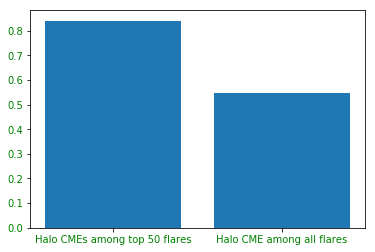

In [7]:
# Question 3: Analysis

# finds the number of flares in top 50 set that are halo CMEs
count = 0
for ele in top_50_flares['is_halo']:
    if ele == 'True':
        count = count + 1

# finds the number of flares in NASA dataset that are halo CMEs
count2 = 0
for ele in df['is_halo']:
    if ele == 'True':
        count2 = count2 + 1

# heights of bars
height = [count/50, count2/511]
 
# names of bars
bars = ('Halo CMEs among top 50 flares', 'Halo CME among all flares')
y_pos = np.arange(len(bars))
 
# creates bars
plt.bar(y_pos, height)
 
# creates the x and y axes
plt.xticks(y_pos, bars, color='green')
plt.yticks(color='green')
 
# shows barplot
plt.show()

# The barplot shows the proportions of flares that have halo CMEs among the top 50 and the entire dataset. As it can be seen, the
# proportion for the first group is about 0.85 while the proportion for the second group is about 0.55. This is reasonable since
# the first group has a much smaller sample size than the other one so it's more likely to find halo CMEs in that sample as 
# opposed to this population (dataset) of the flares recorded by NASA.